In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_fscore_support as prf
from sklearn.metrics import plot_confusion_matrix

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [5]:
# Split samples into their respective classes
class_0 = X_train.loc[y_train==0]
class_1 = X_train.loc[y_train==1]
class_2 = X_train.loc[y_train==2]

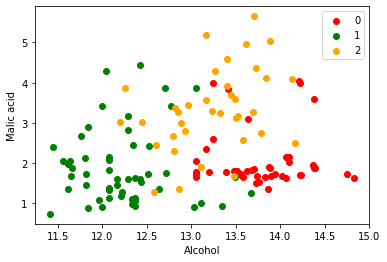

In [6]:
figure, axes = plt.subplots()
axes.scatter(class_0.iloc[:,0], class_0.iloc[:,1], label="0", color="red")
axes.scatter(class_1.iloc[:,0], class_1.iloc[:,1], label="1", color="green")
axes.scatter(class_2.iloc[:,0], class_2.iloc[:,1], label="2", color="orange")
axes.set_xlabel("Alcohol")
axes.set_ylabel("Malic acid")
axes.legend()

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
training_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)
precision, recall, fscore, _ = prf(y_test, dtree.predict(X_test), average="micro")
print(f"""Training accuracy: {training_acc}
Testing accuracy: {test_acc}
Precision: {precision}
Recall: {recall}
FScore: {fscore}""")

Training accuracy: 1.0
Testing accuracy: 0.8666666666666667
Precision: 0.8666666666666667
Recall: 0.8666666666666667
FScore: 0.8666666666666667


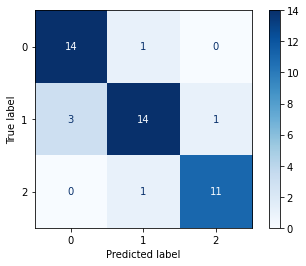

In [9]:
plot_confusion_matrix(dtree, X_test, y_test, cmap=plt.cm.Blues, display_labels=[0, 1, 2])

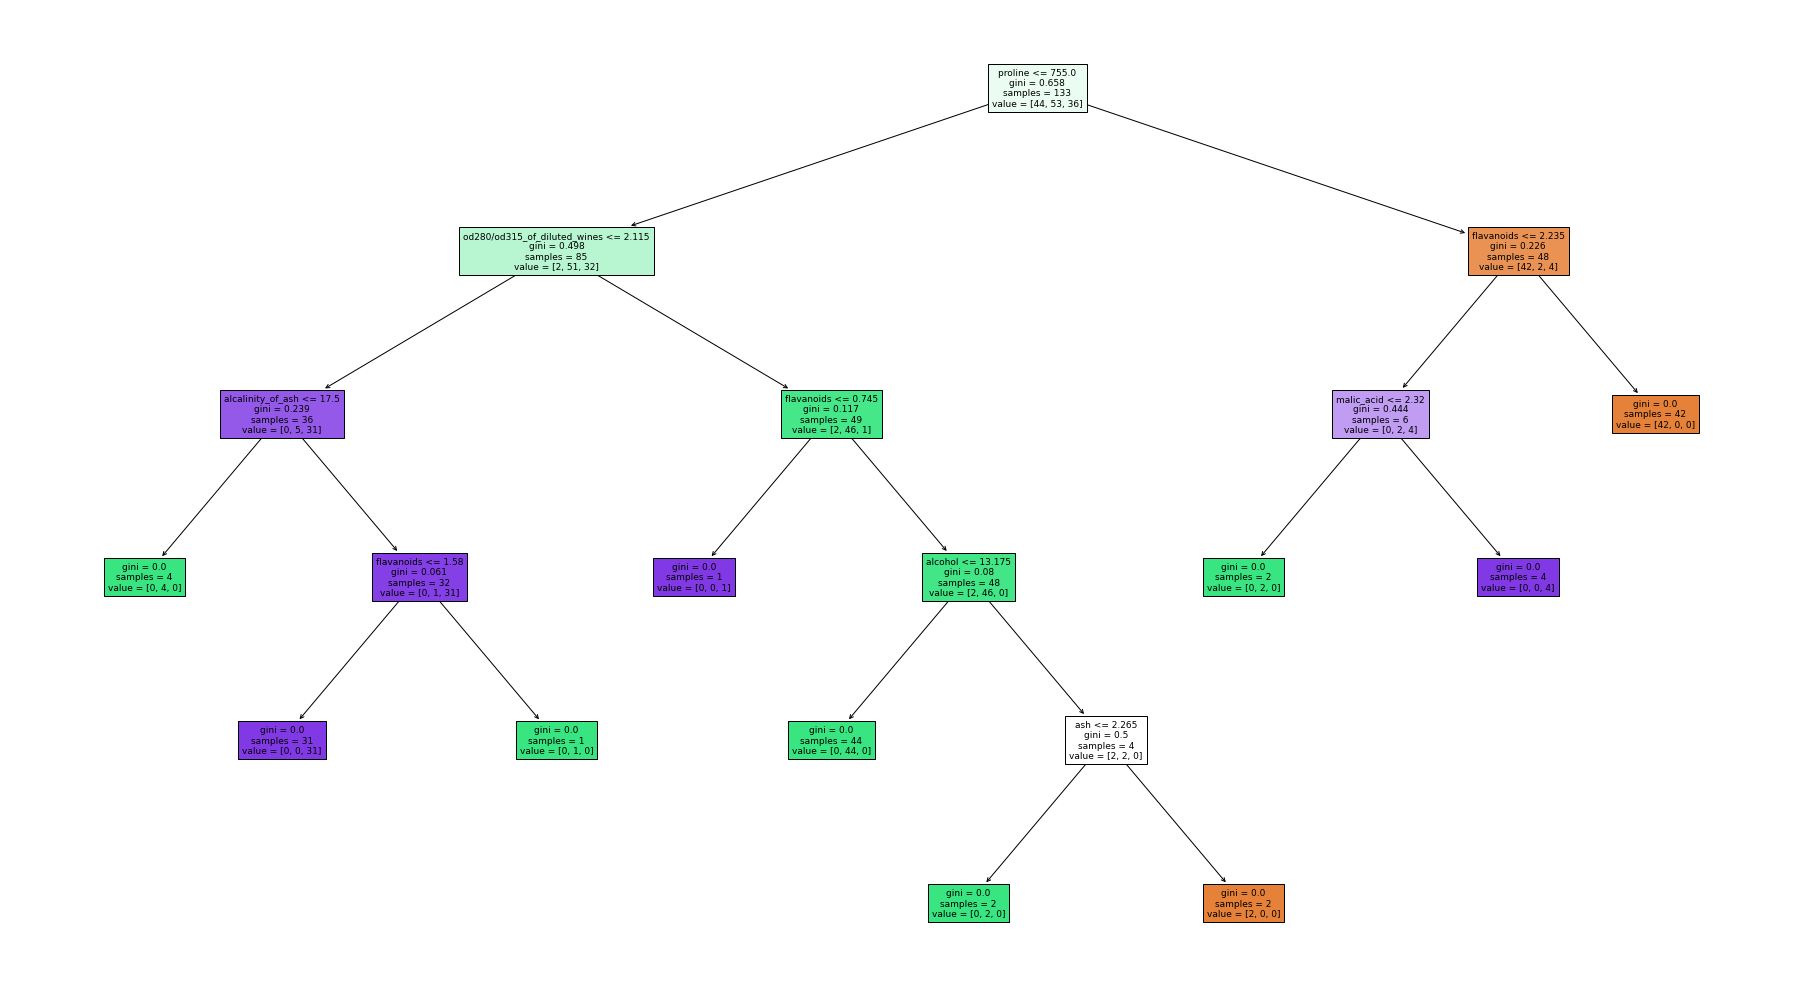

In [10]:
plt.figure(figsize=(32, 18))
plot_tree(dtree, feature_names=X.columns, filled=True, fontsize=9)
plt.show()

### It seems that Decision Tree is considerably better for this dataset. KNN (K = 3) got only around 70% accuracy on the test set, while the Decision Tree hovers around 90% accuracy on the testing set, with Precision, Recall and FScore following this score.